In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance as sc_dist

# makes jupyter display the plots in the notebook
%matplotlib inline

# Task 1.1
We generate our data based on points in $\mathbb{R}^2$ stored in arrays a and b. These points are normal distributed around $(1.5,0)^T$ and $(0,1.5)^T$ respectively.

In [4]:
n = 10

a = np.random.multivariate_normal([3/2,0],[[1,0],[0,1]], n)
b = np.random.multivariate_normal([0,3/2],[[1,0],[0,1]], n)

#print(X,Y)

Next, we generate 200 datapoints by adding normal distributed errors (epsilon) to a random selection from a and b. Then we label the points 1,…,100 (based on a) with 0 and 101,…,200 (based on b) with 1 

In [5]:
def generate_data(z,size):
    """data generator. We disturb the entries in z by gaussian-distributed epsilon."""
    
    eps =np.asarray(np.random.multivariate_normal([0,0],[[1/4,0],[0,1/4]], size))
    indices = np.random.randint(0,len(z),size)
    return np.asarray(z[indices]) + eps


In [6]:
x_normal=np.append(generate_data(a,100),generate_data(b,100),axis=0)
            
y_normal=np.asarray([0]*100+[1]*100)

We plot the data points with respect to their label.

In [7]:
def PlotContourLine(func,window, value=0):
    """This plots the contourline func(x) = value"""
    
    samplenum = 500
    minx = window[0]
    maxx = window[1]
    miny = window[2]
    maxy = window[3]
    xrange = np.arange(minx, maxx, (maxx-minx)/samplenum)
    yrange = np.arange(miny, maxy, (maxy-miny)/samplenum)
    
    #This generates a two-dimensional mesh
    X, Y = np.meshgrid(xrange,yrange)
    # print(X,Y)
    
    argsForf = np.array([X.flatten(),Y.flatten()]).T
    Z = func(argsForf)
    Z = np.reshape(Z,X.shape)
    
    plt.xlim(minx, maxx)
    plt.ylim(miny, maxy)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.contour(X, Y, Z, alpha=0.5,levels=[value],linestyles='dashed',linewidths=3)
    Z = np.where(Z > value, 1, -1)
    plt.contourf(X, Y, Z, alpha=0.2, cmap=plt.cm.coolwarm)

In [8]:
def plot_distrib(x1, x2, f=None, window=(-3,3,-4,4), plot_contour=False):
    """Plots the 2d points x1 and x2 within window. Can also plot the contour line of R^2->R functions"""
    
    if plot_contour:
        #plot the contour line of f
        PlotContourLine(f,window,value=0.5)

    #plot the distribution of data around a and b. x_i: i=1,…,100 cyan;  i=101,…,200 orange. a blue. b red. 
    plt.scatter(x1[:,0],x1[:,1],color='cyan')
    plt.scatter(x2[:,0],x2[:,1],color='orange')
    plt.show()

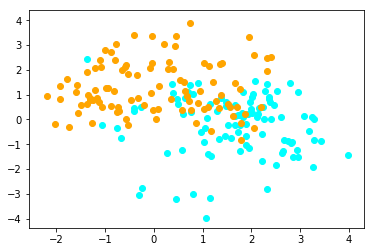

In [9]:
plot_distrib(x_normal[:101,:],x_normal[101:,:])

# Task 1.2
We try to find the best affine linear function f, which matches our labeling of the data and plot the contour of f(x)=0.5.

In [10]:
def generate_LLS_model(x,y):
    """Returns a linear function R^d->R which oprimizes the LLS problem"""
    
    #reorganize the data in a matrix with the first row being (1,...,1)^T
    X_hat = np.asmatrix(np.hstack((np.ones((x.shape[0],1)),x)))

    #solve for the best alpha which mimimines ||X_hat * alpha - y||^2
    alpha = np.linalg.solve(X_hat.T @ X_hat, X_hat.T @ np.asmatrix(y).T)
    
    #implements the linear function based on the previously generated alpha
    f = lambda z: alpha[0,0] + z @ alpha[1:,0]
    
    return f

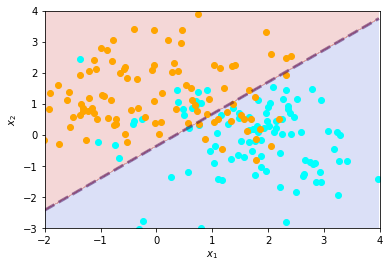

In [11]:
f = generate_LLS_model(x_normal,y_normal)
plot_distrib(x_normal[:101], x_normal[101:], f, window=(-2,4,-3,4), plot_contour=True)

# Task 1.3

Here we calculate the confusion matrix for the classification problem.

In [12]:
def confusion_matrix(x,y,f):
    """his calculates the confusion matrix for classes 0 and 1"""
    
    if x.shape[0] != y.shape[0]: 
        return None
    
    fx = f(x)>=0.5
    
    #we interpret the boolean values [data xi classified as 0, being 1 etc] as 1 and 0.
    #then we use matrix multiplication to count how they are distributed.
    c =  (np.asmatrix(np.vstack((y,np.logical_not(y)))) @ np.asmatrix(np.hstack((fx,np.logical_not(fx))))).T
    
    
    acc = np.trace(c)/x.shape[0]
    

    return (c,acc)

In [55]:
def accuracy(data,label, classes,f,value = 0):
    """Calculates the accuracy of a 2 classes classification funcion f. Data : (n,d), label: (n), classes 2-tuple"""
        
    is_class_0 = f(data) < value
    is_class_1 = np.logical_not(is_class_0)
        
    # Get the labels in the same shape as the is_class
    label_0 = np.matrix(label == classes[0]).T
    label_1 = np.matrix(label == classes[1]).T

    correct_class_0 = np.count_nonzero(np.logical_and(label_0, is_class_0))
    correct_class_1 = np.count_nonzero(np.logical_and(label_1, is_class_1))
    
    
    return (correct_class_0 + correct_class_1)/(data.shape[0])


In [56]:

print(accuracy(x_normal,y_normal,(0,1),f, value = .5))
print(confusion_matrix(x_normal,y_normal,f))

(200, 1)
(200,)
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [F

On order to test our model we generate another 10000 data points with the same distribution and run them through the LLS solution.

In [14]:
num_testvalues=10000

x_test = np.append(generate_data(a,num_testvalues),generate_data(b,num_testvalues),axis=0)
y_test = np.append([0]*num_testvalues,[1]*num_testvalues)   


print(confusion_matrix(x_test,y_test,f))

(matrix([[9440, 1415],
        [ 560, 8585]]), 0.90125)


We can see that our model actually does better on the training data than on the data it was trained on.

# Task 1.4

In [15]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
irisDataFrame = pd.read_csv(url, header=None)
window = (4,8,1.5,4.5) #setup for the plotting

URLError: <urlopen error [Errno -2] Name or service not known>

We gather the data form the iris dataset and print it.

In [14]:
#print(irisDataFrame)

We select the first two dimensions of the iris data and create the correct labels. Iris-setosa: 0 , other: 1. Then we generate the approximating linear function f_2d and plot the data with the contour line.

In [22]:
x_iris_2d = irisDataFrame.loc[:,0:1].values
y_iris = (irisDataFrame.loc[:,4].values != 'Iris-setosa')*1

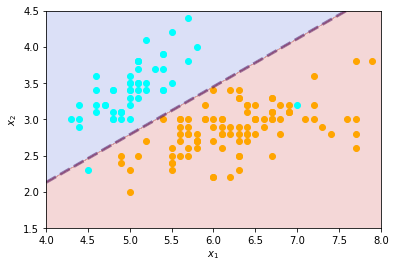

(150, 2)


In [23]:
f_2d = generate_LLS_model(x_iris_2d,y_iris)
confusion_matrix(x_iris_2d,y_iris,f_2d)

plot_distrib(x_iris_2d[:51],x_iris_2d[51:],f_2d,window=window,plot_contour=True)

print(x_iris_2d.shape)


We also compute the LLS with all four dimensions and evaluate it.

In [24]:
x_iris_4d = irisDataFrame.loc[:,0:3].values

f_4d = generate_LLS_model(x_iris_4d,y_iris)
confusion_matrix(x_iris_4d,y_iris,f_4d)


(matrix([[100,   0],
         [  0,  50]]), 1.0)

Here we can see that our model can seperate the iris-setosa plant quite good based on the training data. We also see an increase in accuracy when we add the last two dimensions to the model.

Now we repeat the earlier steps with seperating Iris-versicolor instead.

(matrix([[88, 29],
        [12, 21]]), 0.7266666666666667)


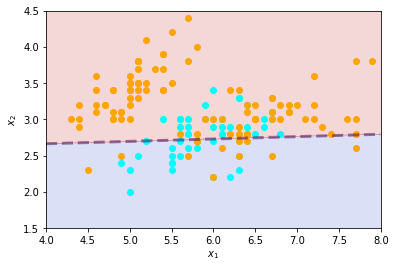

In [25]:
y_iris = (irisDataFrame.loc[:,4].values != 'Iris-versicolor')*1
f_2d = generate_LLS_model(x_iris_2d,y_iris)
print(confusion_matrix(x_iris_2d,y_iris,f_2d))

plot_distrib(x_iris_2d[51:101],np.append(x_iris_2d[:51],x_iris_2d[101:],axis=0),f_2d,window=window,plot_contour=True)

In [26]:
x_iris_4d = irisDataFrame.loc[:,0:3].values

f_4d = generate_LLS_model(x_iris_4d,y_iris)
print(confusion_matrix(x_iris_4d,y_iris,f_4d))


(matrix([[86, 26],
        [14, 24]]), 0.7333333333333333)


# K-nearest neighbours

# Task 1.8

In [16]:
def generate_KNN(x, data, labels, k):
    dist = sc_dist.cdist(x,data,'euclidean')
    N_k = np.argpartition(dist,k,axis=1)[:,:k+1]
    
    # Here we have a slight problem. If we set N_k = np.argpartition(dist,k+1,axis=1)[:,0:k+1] we get a more reasonable
    # graph in the last diagramm. However, this would not make sense since we would look at k+1 neighours instead of k.
    # I don't know how to resolve this.
    
    #print(labels[N_k])
    labeling = np.sum(labels[N_k],axis=1)/(k)
    
    return np.matrix(labeling).T

(matrix([[100,  13],
        [  0,  87]]), 0.935)


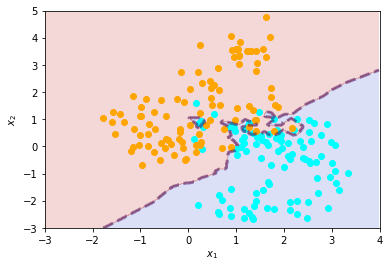

(matrix([[92, 10],
        [ 8, 90]]), 0.91)


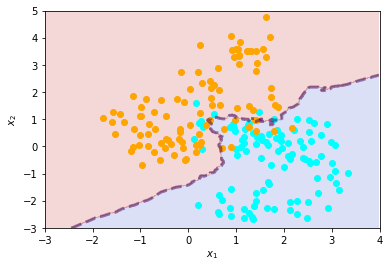

(matrix([[89,  7],
        [11, 93]]), 0.91)


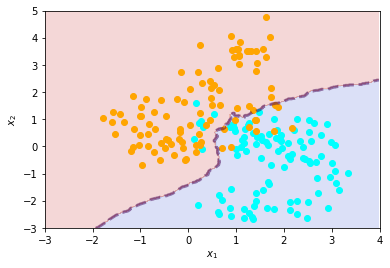

In [17]:
for i in [1,10,30]:
    f_kNN_i = lambda z : generate_KNN(z,x_normal,y_normal,i)
    print(confusion_matrix(x_normal,y_normal,f_kNN_i))
    plot_distrib(x_normal[:101],x_normal[101:],f_kNN_i,window = (-3,4,-3,5),plot_contour=True)

We can see how checking more neighbours does lower the accuracy, while increasing the smoothness of the contourline.

"\nplt.subplot(133)\nplt.title('Iris data')\n\naccuracy_normal = [confusion_matrix(x_iris_2d,y_iris,lambda z: generate_KNN(z,x_iris_2d,y_iris, i))[1] for i in range(1,149)]\nplt.plot(range(1,149),accuracy_normal)\nplt.show()"

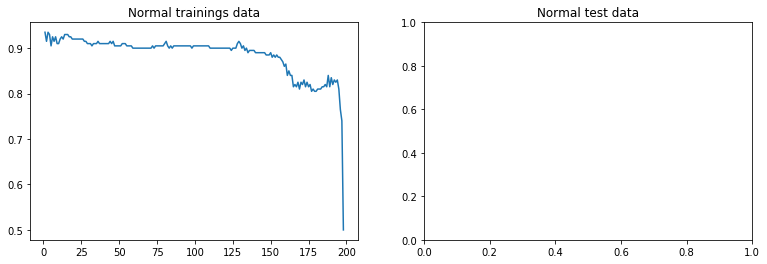

In [18]:
plt.figure(figsize=(20, 4))

plt.subplot(131)
plt.title('Normal trainings data')


accuracy_normal = [confusion_matrix(x_normal,y_normal,lambda z: generate_KNN(z,x_normal,y_normal, i))[1] for i in range(1,199)]
plt.plot(range(1,199),accuracy_normal)

plt.subplot(132)
plt.title('Normal test data')

#accuracy_normal = [confusion_matrix(x_test,y_test,lambda z: generate_KNN(z,x_normal,y_normal,i))[1] for i in range(1,199)]
#plt.plot(range(1,199),accuracy_normal)

"""
plt.subplot(133)
plt.title('Iris data')

accuracy_normal = [confusion_matrix(x_iris_2d,y_iris,lambda z: generate_KNN(z,x_iris_2d,y_iris, i))[1] for i in range(1,149)]
plt.plot(range(1,149),accuracy_normal)
plt.show()"""

For the normal distributed data we find that we settle with the accuracy at around 80%